# Fraudulent Transaction Prediction

The Dataset is to be identify about a transaction to predict whether it is Fraudulent or Not

We are presented with a labeled dataset of financial transactions, some of which are fraudulent. We will be performing exploratory data analysis on this data, and then creating a classifier model to predict whether a transaction is fraudulent given the included features. The objective of this project is to explain my thought processes in solving this problem, as well as addressing some of the issues that inherently face machine learning models. ("All models are wrong, but some are useful.") Using this notebook, I hope to focus primarily on transparency and clarity rather than raw predictive performance, and readability for an audience without a specialization in data science.

**Import Libraries**

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
import xgboost as xgb
import sklearn.metrics as metrics

import math
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
#We want our plots to appear in the Notebook
%matplotlib inline 

In [4]:
#Read The Dataset
data = pd.read_csv("C:\\Users\\Asus\\raju\\fraud transcation ml project\\Fraud.csv")

In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048565,95,TRANSFER,132387.24,C1654402840,15956.51,0.00,C1878219072,631284.08,763671.32,0,0
1048566,95,PAYMENT,12598.15,C565523855,30601.00,18002.85,M1740980642,0.00,0.00,0,0
1048567,95,CASH_OUT,279674.05,C990252469,18002.85,0.00,C574439165,1847488.28,2127162.32,0,0
1048568,95,PAYMENT,20721.54,C954269986,49732.00,29010.46,M812667644,0.00,0.00,0,0
1048569,95,PAYMENT,3210.11,C2113264897,11113.00,7902.89,M1989479599,0.00,0.00,0,0
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,0


In [7]:
# describe the dataset
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [8]:
#data structure
print(type(data))
data.shape

<class 'pandas.core.frame.DataFrame'>


(1048575, 11)

In [9]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
#data types of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [11]:
#count the duplicates
data[data.duplicated()].shape

(0, 11)

In [12]:
#To identify the unique values
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [13]:
numeric_data = data.select_dtypes(include=[np.number])
skew_data = numeric_data.skew()
print(skew_data)

step               1.294455
amount             6.374166
oldbalanceOrg      5.124286
newbalanceOrig     5.060456
oldbalanceDest     5.373195
newbalanceDest     5.012456
isFraud           30.252198
isFlaggedFraud     0.000000
dtype: float64


In [14]:
print('Data does not have any NULL value.')
data.isnull().any()

Data does not have any NULL value.


step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [15]:
data.rename(columns={'newbalanceOrig':'newbalanceOrg'},inplace=True)
data.drop(labels=['nameOrig','nameDest'],axis=1,inplace=True)

The provided data has the financial transaction data as well as the target variable isFraud, which is the actual fraud status of the transaction and isFlaggedFraud is the indicator which the simulation is used to flag the transaction using some threshold value.

In [16]:
print('Minimum value of Amount, Old/New Balance of Origin/Destination:')
data[[ 'amount','oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']].min()

Minimum value of Amount, Old/New Balance of Origin/Destination:


amount            0.1
oldbalanceOrg     0.0
newbalanceOrg     0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

In [17]:
print('Maximum value of Amount, Old/New Balance of Origin/Destination:')
data[[ 'amount','oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']].max()

Maximum value of Amount, Old/New Balance of Origin/Destination:


amount            10000000.0
oldbalanceOrg     38900000.0
newbalanceOrg     38900000.0
oldbalanceDest    42100000.0
newbalanceDest    42200000.0
dtype: float64

Data analysis

Since there are no missing and junk values, there is no need for additional data cleansing, but we still need to perform data analysis since the data contains huge variations in the value in different columns. Normalization will also improve the overall accuracy of the machine learning model.

# Data analysis

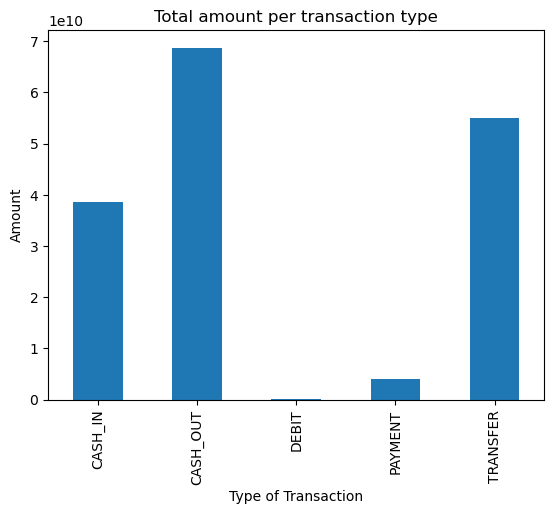

In [18]:
var = data.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');

In [19]:
data.loc[data.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [20]:
# Pairwise Pearson correlations
numeric_data = data.select_dtypes(include=[np.number])
correlations = numeric_data.corr(method='pearson')
print(correlations)

                    step    amount  oldbalanceOrg  newbalanceOrg  \
step            1.000000 -0.025996      -0.006780      -0.007180   
amount         -0.025996  1.000000       0.004864      -0.001133   
oldbalanceOrg  -0.006780  0.004864       1.000000       0.999047   
newbalanceOrg  -0.007180 -0.001133       0.999047       1.000000   
oldbalanceDest -0.002251  0.215558       0.093305       0.095182   
newbalanceDest -0.019503  0.311936       0.064049       0.063725   
isFraud         0.045030  0.128862       0.003829      -0.009438   
isFlaggedFraud       NaN       NaN            NaN            NaN   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                 -0.002251       -0.019503  0.045030             NaN  
amount                0.215558        0.311936  0.128862             NaN  
oldbalanceOrg         0.093305        0.064049  0.003829             NaN  
newbalanceOrg         0.095182        0.063725 -0.009438             NaN  
oldbalanceDe

In [21]:
# Drop non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation of 'isFraud' with other numeric columns
correlation_with_is_fraud = numeric_data.corr()['isFraud']
print(correlation_with_is_fraud)

step              0.045030
amount            0.128862
oldbalanceOrg     0.003829
newbalanceOrg    -0.009438
oldbalanceDest   -0.007552
newbalanceDest   -0.000495
isFraud           1.000000
isFlaggedFraud         NaN
Name: isFraud, dtype: float64


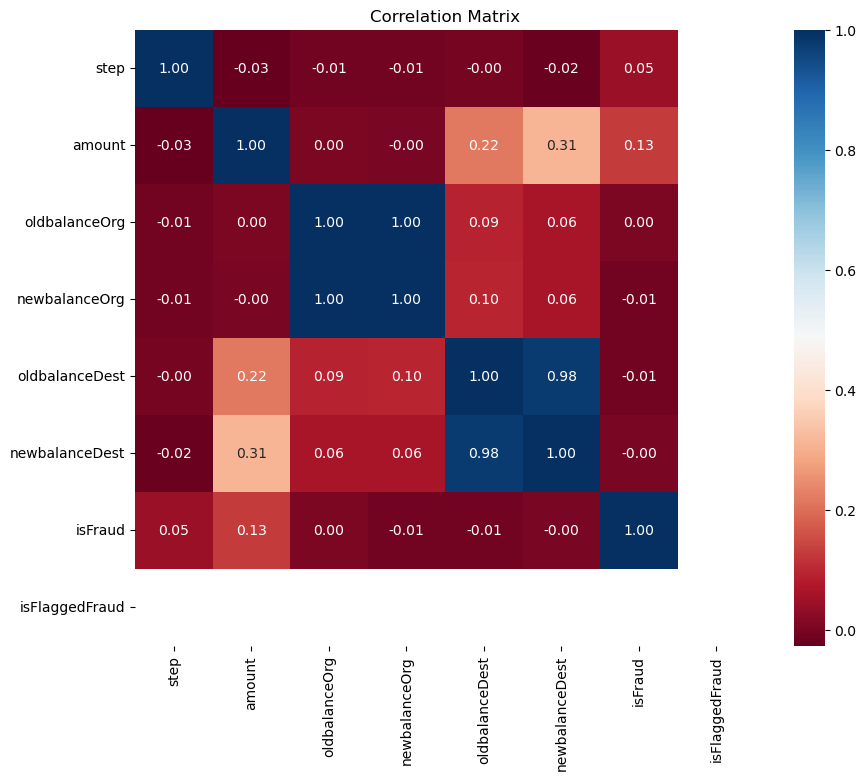

In [22]:
# Drop non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Create a heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), cmap='RdBu', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

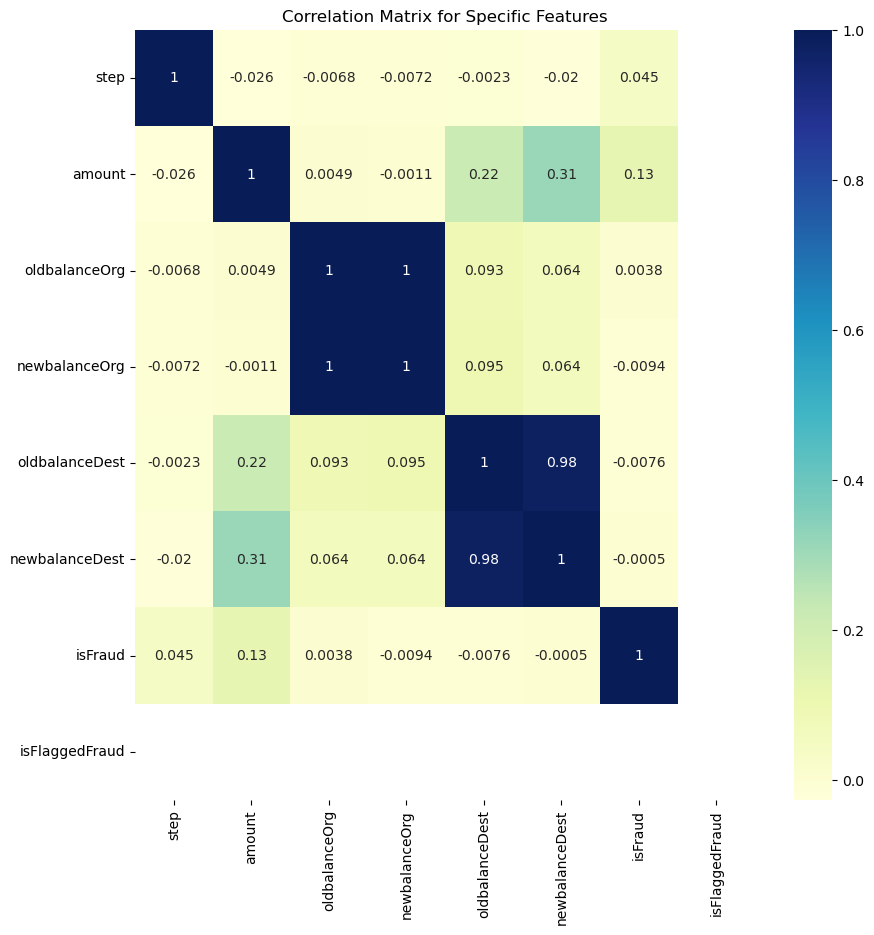

In [23]:

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Get the index of the correlation matrix (column names)
top_corr_features = correlation_matrix.index

# Visualize the correlation matrix for specific features
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix for Specific Features')
plt.show()

What can we do with this heatmap:

OldbalanceOrg and NewbalanceOrg are highly correlated.
OldbalanceDest and NewbalanceDest are highly correlated.
The sum correlates with isFraud(target variable).
There is not much relationship between these features, so we need to understand where the relationship between them depends on the type of transaction and the amount. To do this, we need to see the heatmap of fraudulent and non-fraudulent transactions differently.

In [24]:
fraud = data.loc[data.isFraud == 1]
nonfraud = data.loc[data.isFraud == 0]
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()

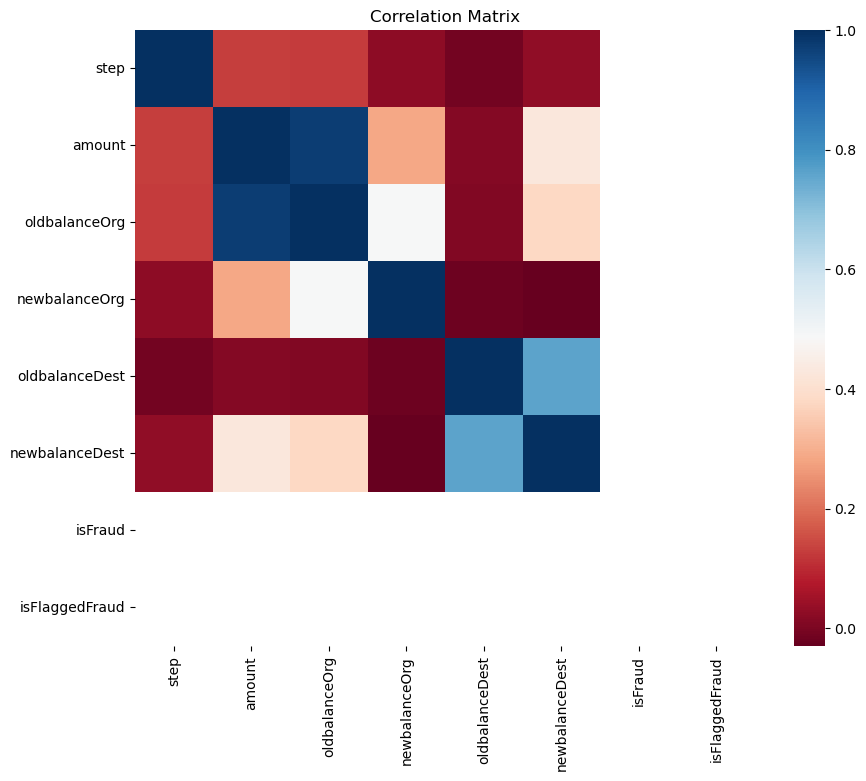

In [25]:
# Select only numeric columns
numeric_data = fraud.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix using seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

There are 2 flags that stand out to me that are interesting to look at: isFraud and isFlaggedFraud column. Based on the hypothesis, isFraud is an indicator that indicates actual fraudulent transactions, while isFlaggedFraud is that the system is preventing a transaction due to some thresholds being triggered. From the heatmap above, we can see that there is some relationship between the other columns and isFlaggedFraud, hence there must be a relationship between isFraud.

In [26]:
print('The total number of fraud transaction is {}.'.format(data.isFraud.sum()))
print('The total number of fraud transaction which is marked as fraud {}.'.format(data.isFlaggedFraud.sum()))
print('Ratio of fraud transaction vs non-fraud transaction is 1:{}.'.format(int(nonfraudcount//fraudcount)))

The total number of fraud transaction is 1142.
The total number of fraud transaction which is marked as fraud 0.
Ratio of fraud transaction vs non-fraud transaction is 1:917.


In [27]:
print('Thus in every 773 transaction there is 1 fraud transaction happening.')
print('Amount lost due to these fraud transaction is ${}.'.format(int(fraud.amount.sum())))


Thus in every 773 transaction there is 1 fraud transaction happening.
Amount lost due to these fraud transaction is $1361982240.


In [28]:
piedata = fraud.groupby(['isFlaggedFraud']).sum()

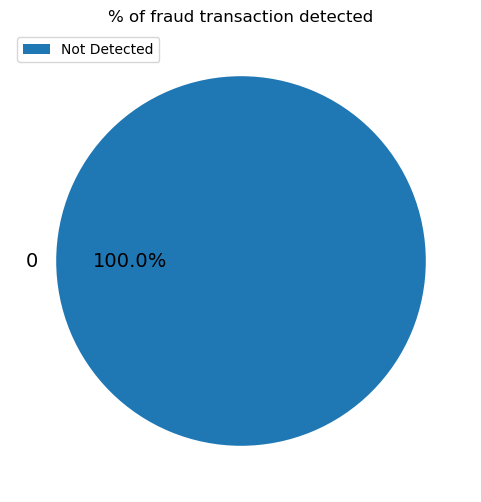

In [29]:
f, axes = plt.subplots(1,1, figsize=(6,6))
axes.set_title("% of fraud transaction detected")
piedata.plot(kind='pie',y='isFraud',ax=axes, fontsize=14,shadow=False,autopct='%1.1f%%');
axes.set_ylabel('');
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()

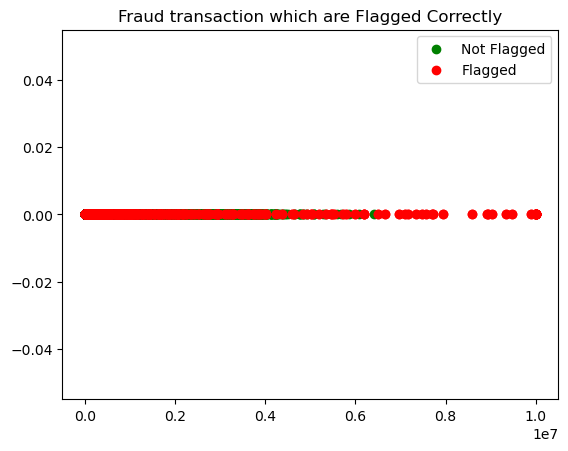

In [30]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.set_title("Fraud transaction which are Flagged Correctly")
axes.scatter(nonfraud['amount'],nonfraud['isFlaggedFraud'],c='g')
axes.scatter(fraud['amount'],fraud['isFlaggedFraud'],c='r')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

In [31]:
fraud= data.groupby('isFraud').size()
print(fraud)

isFraud
0    1047433
1       1142
dtype: int64


In [32]:
fraud=data.isFraud.value_counts(normalize=True)*100
fraud

isFraud
0    99.89109
1     0.10891
Name: proportion, dtype: float64

In [33]:
false=data[data['isFraud']==1]
true=data[data['isFraud']==0]
n=len(false)/float(len(true))
print('false detection:{}'.format(len(data[data['isFraud']==1])))
print('true detection:{}'.format(len(data[data['isFraud']==0])))

false detection:1142
true detection:1047433


In [34]:
false=data[data['isFraud']==1]
true=data[data['isFraud']==0]
print('false detection')
print(false.amount.describe()/100,"\n")

print('true detection')
print(true.amount.describe()/100)

false detection
count        11.420000
mean      11926.289321
std       20305.989638
min           1.190000
25%         860.701700
50%        3531.794500
75%       12487.590025
max      100000.000000
Name: amount, dtype: float64 

true detection
count    10474.330000
mean      1575.396628
std       2541.882853
min          0.001000
25%        121.348700
50%        762.149700
75%       2134.927500
max      64198.352700
Name: amount, dtype: float64


From the above data we can infer that less than 0.13% of the total transaction are fraudulent

The plot above clearly shows the need for a system that can be fast and reliable to flag a transaction as a fraud. Because the current system allows fraudulent transactions to go through a system that does not label them as fraud. Some data exploration can be useful for testing relationships between objects.

# Data Visualization for descrete data

<Axes: xlabel='isFraud'>

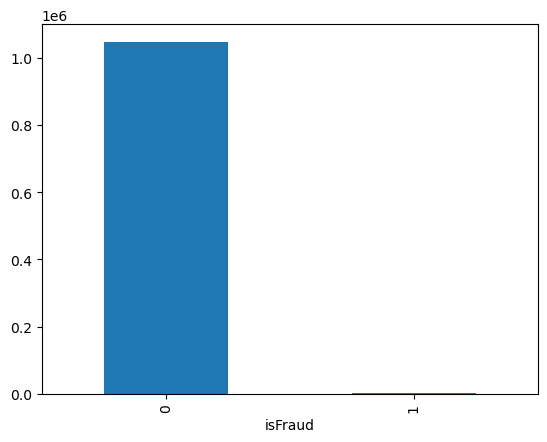

In [35]:
data.isFraud.value_counts().plot(kind='bar')

<Axes: >

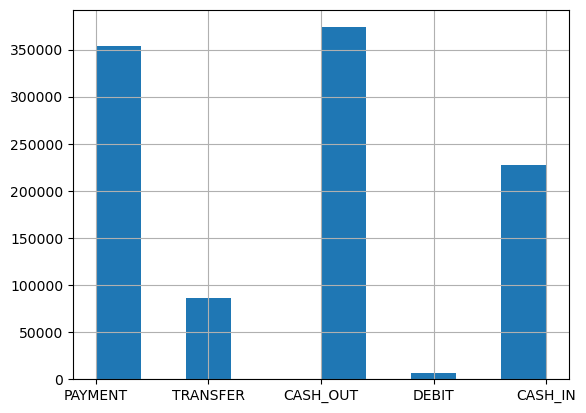

In [36]:
#histogram of types of transaction
data['type'].hist()

In [37]:
data.isFlaggedFraud.value_counts()

isFlaggedFraud
0    1048575
Name: count, dtype: int64

In [38]:
print("individual type of transactions:")
print((data.type.value_counts()/data.type.value_counts().sum())*100)

individual type of transactions:
type
CASH_OUT    35.633217
PAYMENT     33.747991
CASH_IN     21.660825
TRANSFER     8.273419
DEBIT        0.684548
Name: count, dtype: float64


Text(0.5, 1.0, 'Types of Transactions')

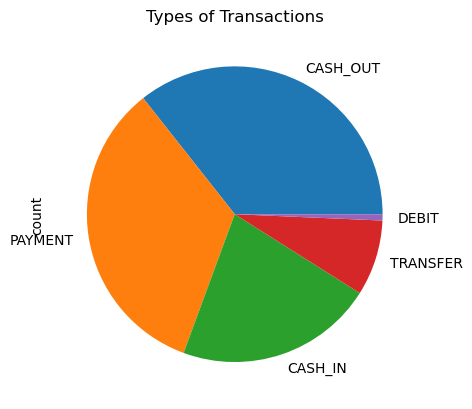

In [39]:
data.type.value_counts().plot(kind='pie')
plt.title('Types of Transactions')

<Axes: >

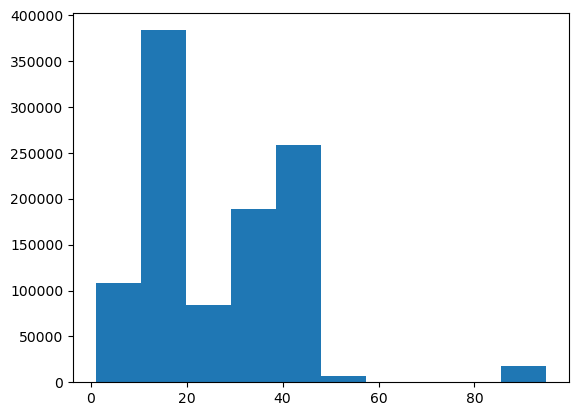

In [40]:
data.step.hist(grid=False)

# Data exploration

In [41]:
fraud = data.loc[data.isFraud == 1]
nonfraud = data.loc[data.isFraud == 0]
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()

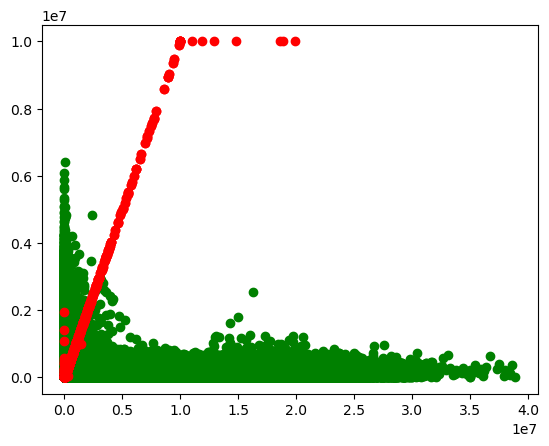

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceOrg'],nonfraud['amount'],c='g')
ax.scatter(fraud['oldbalanceOrg'],fraud['amount'],c='r')
plt.show()

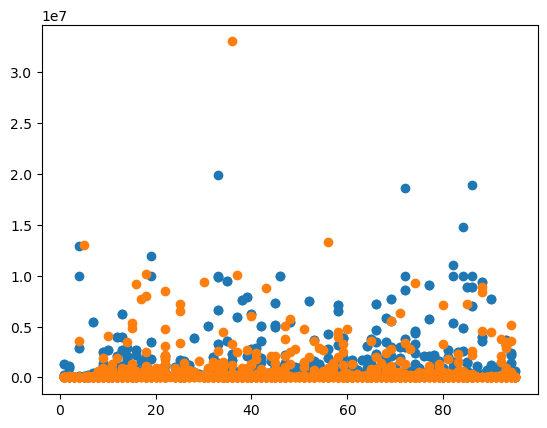

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

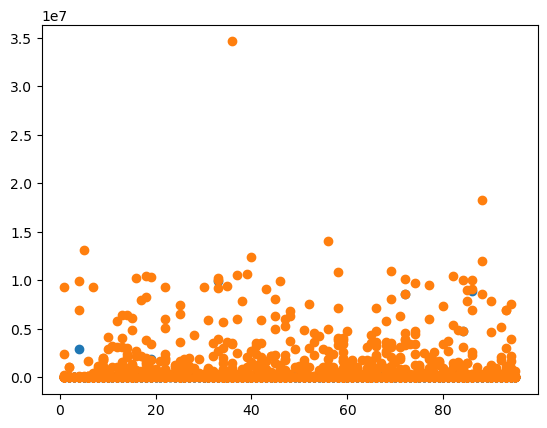

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceDest'])
plt.show()

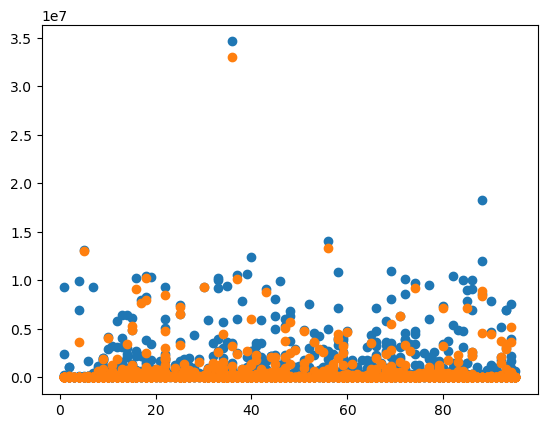

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceDest'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

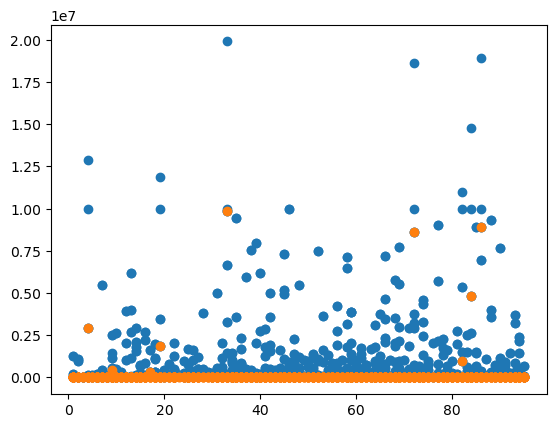

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
plt.show()

In [47]:
pd.crosstab(data.isFraud, data.type)

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,227130,373063,7178,353873,86189
1,0,578,0,0,564


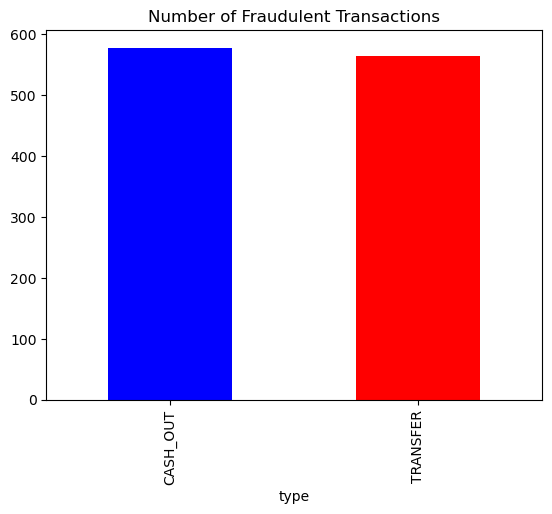

In [48]:
data.type[data.isFraud == 1].value_counts().plot(kind="bar", color=["blue","red"])

plt.title("Number of Fraudulent Transactions");

From the above crosstab we can infer that fraudulent transactions take place only in CASH_OUT and TRASNFER type of transactions where 4116 of CASH_OUT and 4097 of TRANSFER transactions where fraudulent.

# To find out the Target variable using manual prediction

In [50]:
data=pd.read_csv("C:\\Users\\Asus\\raju\\fraud transcation ml project\\Fraud.csv")

In [51]:
data['merchant'] = data['nameDest'].str.contains('M')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,True
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,True
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,True


In [52]:
data[['isFraud','merchant']].value_counts()

isFraud  merchant
0        False       693560
         True        353873
1        False         1142
Name: count, dtype: int64

In [53]:
data[data['isFraud']==1].head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0,False
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0,False
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0,False
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0,False
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0,False
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0,False
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0,False
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1,0,False
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0,False
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1,0,False


In [54]:
# Counts of each transaction type for fraudulent transactions
data[data['isFraud']==1]['type'].value_counts()

type
CASH_OUT    578
TRANSFER    564
Name: count, dtype: int64

TO identify in PAYMENT MODE

In [55]:
payment=data[data['type']=='PAYMENT']
payment

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0,True
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0,True
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0,True
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.0,0,0,True
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,95,PAYMENT,3210.11,C2113264897,11113.00,7902.89,M1989479599,0.0,0.0,0,0,True
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.0,0.0,0,0,True
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.0,0.0,0,0,True
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.0,0.0,0,0,True


In [56]:
payment.shape

(353873, 12)

In [57]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353873 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            353873 non-null  int64  
 1   type            353873 non-null  object 
 2   amount          353873 non-null  float64
 3   nameOrig        353873 non-null  object 
 4   oldbalanceOrg   353873 non-null  float64
 5   newbalanceOrig  353873 non-null  float64
 6   nameDest        353873 non-null  object 
 7   oldbalanceDest  353873 non-null  float64
 8   newbalanceDest  353873 non-null  float64
 9   isFraud         353873 non-null  int64  
 10  isFlaggedFraud  353873 non-null  int64  
 11  merchant        353873 non-null  bool   
dtypes: bool(1), float64(5), int64(3), object(3)
memory usage: 32.7+ MB


In [58]:
data['balancediffOrig'] = data['newbalanceOrig'] - data['oldbalanceOrg']
data['balancediffDest'] = data['newbalanceDest'] - data['oldbalanceDest']
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,True,-9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,True,-1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,-181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,-181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,True,-11668.14,0.0


In [59]:
data['Orig_diff_amount']=data['amount']+data['balancediffOrig']
data['dest_diff_amount']=data['amount']+data['balancediffDest']
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,True,-9839.64,0.0,-1.455192e-11,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,True,-1864.28,0.0,1.136868e-12,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,-181.00,0.0,0.000000e+00,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,-181.00,-21182.0,0.000000e+00,-21001.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,True,-11668.14,0.0,0.000000e+00,11668.14


In [60]:
def not_fraud(data):
    lab=[]
    for i in range(len(data)):
        l=int(0)
        lab.append(l)
    return lab

In [61]:
def fraud(data):
    lab=[]
    for i in range(len(data)):
        l=int(1)
        lab.append(l)
    return lab

In [62]:
payment["Fraud_Id"]=data[data["type"]=="PAYMENT"]['isFraud']

C:\Users\Asus\AppData\Local\Temp\ipykernel_24380\279791607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment["Fraud_Id"]=data[data["type"]=="PAYMENT"]['isFraud']


In [63]:
payment["Fraud_Id"].value_counts()

Fraud_Id
0    353873
Name: count, dtype: int64

In [64]:
payment["Fraud_Id"].unique()

array([0], dtype=int64)

There is no Fraud cases in PAYMENT MODE

# Cash in

In [65]:
cashin=data[data['type']=='CASH_IN']
cashin

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount
389,1,CASH_IN,143236.26,C1862994526,0.00,143236.26,C1688019098,608932.17,97263.78,0,0,False,143236.26,-511668.39,286472.52,-3.684321e+05
390,1,CASH_IN,228451.89,C1614133563,143236.26,371688.15,C2083562754,719678.38,1186556.81,0,0,False,228451.89,466878.43,456903.78,6.953303e+05
391,1,CASH_IN,35902.49,C839771540,371688.15,407590.65,C2001112025,49003.30,0.00,0,0,False,35902.50,-49003.30,71804.99,-1.310081e+04
392,1,CASH_IN,232953.64,C1037163664,407590.65,640544.28,C33524623,1172672.27,1517262.16,0,0,False,232953.63,344589.89,465907.27,5.775435e+05
393,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,C1330106945,104198.26,24044.18,0,0,False,65912.95,-80154.08,131825.90,-1.424113e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048367,95,CASH_IN,63497.34,C477066056,347.00,63844.34,C577168541,0.00,0.00,0,0,False,63497.34,0.00,126994.68,6.349734e+04
1048478,95,CASH_IN,347999.74,C1007542443,21246.00,369245.74,C1798573266,364028.35,16028.61,0,0,False,347999.74,-347999.74,695999.48,0.000000e+00
1048483,95,CASH_IN,345998.11,C1864721083,5010.00,351008.11,C2091086284,442981.57,96983.45,0,0,False,345998.11,-345998.12,691996.22,-1.000000e-02
1048560,95,CASH_IN,113412.53,C928894150,41533.00,154945.53,C1668344599,565908.33,452495.80,0,0,False,113412.53,-113412.53,226825.06,2.910383e-11


In [66]:
cashin["Fraud_Id"]=data[data["type"]=="CASH_IN"]['isFraud']

C:\Users\Asus\AppData\Local\Temp\ipykernel_24380\686279831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cashin["Fraud_Id"]=data[data["type"]=="CASH_IN"]['isFraud']


In [67]:
cashin.Fraud_Id.value_counts()

Fraud_Id
0    227130
Name: count, dtype: int64

In [68]:
cashin.Fraud_Id.unique()

array([0], dtype=int64)

# Debit

In [69]:
debit=data[data['type']=='DEBIT']
debit

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.00,40348.79,0,0,False,-5337.77,-1549.21,3.637979e-12,3788.56
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.00,157982.12,0,0,False,-4465.00,147137.12,5.179940e+03,156782.06
21,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.00,16896.70,0,0,False,-9302.79,-12935.30,0.000000e+00,-3632.51
22,1,DEBIT,1065.41,C1959239586,1817.0,751.59,C515132998,10330.00,0.00,0,0,False,-1065.41,-10330.00,2.273737e-13,-9264.59
41,1,DEBIT,5758.59,C1466917878,32604.0,26845.41,C1297685781,209699.00,16997.22,0,0,False,-5758.59,-192701.78,0.000000e+00,-186943.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048420,95,DEBIT,1109.03,C1843941871,374371.0,373261.97,C1493676049,87505.30,88614.33,0,0,False,-1109.03,1109.03,-2.796696e-11,2218.06
1048453,95,DEBIT,8517.90,C541482717,43290.0,34772.10,C1658266097,132773.47,141291.37,0,0,False,-8517.90,8517.90,-1.818989e-12,17035.80
1048546,95,DEBIT,2368.49,C855991004,289.0,0.00,C1932870004,666959.45,669327.94,0,0,False,-289.00,2368.49,2.079490e+03,4736.98
1048549,95,DEBIT,9983.95,C130161561,997.0,0.00,C740635949,2341925.24,2351909.19,0,0,False,-997.00,9983.95,8.986950e+03,19967.90


In [70]:
debit["Fraud_Id"]=data[data["type"]=="DEBIT"]['isFraud']

C:\Users\Asus\AppData\Local\Temp\ipykernel_24380\2712071344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debit["Fraud_Id"]=data[data["type"]=="DEBIT"]['isFraud']


In [71]:
debit.Fraud_Id.value_counts()

Fraud_Id
0    7178
Name: count, dtype: int64

In [72]:
debit.Fraud_Id.unique()

array([0], dtype=int64)

# Cash out

In [73]:
cashout=data[data['type']=='CASH_OUT']
cashout

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,-181.00,-21182.00,0.000000e+00,-21001.00
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0,False,-15325.00,46430.44,2.138089e+05,275564.38
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.00,C1509514333,288800.00,2415.16,0,0,False,-26845.41,-286384.84,8.356930e+04,-175970.13
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.00,C824009085,70253.00,64106.18,0,0,False,-1942.02,-6146.82,5.501188e+04,50807.08
48,1,CASH_OUT,5346.89,C512549200,0.00,0.00,C248609774,652637.00,6453430.91,0,0,False,0.00,5800793.91,5.346890e+03,5806140.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048520,95,CASH_OUT,61654.72,C187514699,16057.00,0.00,C1195667457,849667.70,1082415.65,0,0,False,-16057.00,232747.95,4.559772e+04,294402.67
1048553,95,CASH_OUT,103391.93,C2021893664,107623.00,4231.07,C178178755,5752648.68,5856040.61,0,0,False,-103391.93,103391.93,0.000000e+00,206783.86
1048558,95,CASH_OUT,26535.41,C1213094114,104187.00,77651.59,C216374600,205460.26,231995.66,0,0,False,-26535.41,26535.40,-3.637979e-12,53070.81
1048567,95,CASH_OUT,279674.05,C990252469,18002.85,0.00,C574439165,1847488.28,2127162.32,0,0,False,-18002.85,279674.04,2.616712e+05,559348.09


In [74]:
cashout.shape

(373641, 16)

Cash out NOT FRAUD TRANSACTION

In [75]:
cashout_notfraud=cashout[cashout['oldbalanceOrg']==0]
cashout_notfraud1=cashout[(cashout['amount']>=cashout['oldbalanceOrg'])&
          (cashout['balancediffDest']<0) & cashout['oldbalanceOrg']!=0]
cashout_notfraud2=cashout[(cashout['amount']<cashout['oldbalanceOrg'])&
          (cashout['balancediffDest']<0) & cashout['oldbalanceOrg']!=0]
cashout_notfraud3=pd.concat([cashout_notfraud,cashout_notfraud1,cashout_notfraud2],axis=0)

In [76]:
cashout_notfraud3['Fraud_Id']=not_fraud(cashout_notfraud3)
cashout_notfraud3

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount,Fraud_Id
48,1,CASH_OUT,5346.89,C512549200,0.00,0.00,C248609774,652637.00,6453430.91,0,0,False,0.00,5800793.91,5.346890e+03,5806140.80,0
106,1,CASH_OUT,28404.60,C2091072548,0.00,0.00,C1282788025,51744.00,0.00,0,0,False,0.00,-51744.00,2.840460e+04,-23339.40,0
107,1,CASH_OUT,75405.10,C263053820,0.00,0.00,C1870252780,104209.00,46462.23,0,0,False,0.00,-57746.77,7.540510e+04,17658.33,0
108,1,CASH_OUT,50101.88,C1740826931,0.00,0.00,C97730845,67684.00,9940339.29,0,0,False,0.00,9872655.29,5.010188e+04,9922757.17,0
109,1,CASH_OUT,14121.82,C69062746,0.00,0.00,C100555887,52679.00,10963.66,0,0,False,0.00,-41715.34,1.412182e+04,-27593.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009066,46,CASH_OUT,9207.83,C970027961,52032.00,42824.17,C57929559,231396.06,205505.10,0,0,False,-9207.83,-25890.96,-1.818989e-12,-16683.13,0
1016390,47,CASH_OUT,2153.37,C2026803637,10254.00,8100.63,C1260410352,30150.00,28068.86,0,0,False,-2153.37,-2081.14,0.000000e+00,72.23,0
1020511,47,CASH_OUT,57672.50,C1925396859,91347.54,33675.04,C397117941,755965.29,311078.45,0,0,False,-57672.50,-444886.84,7.275958e-12,-387214.34,0
1026952,48,CASH_OUT,851.67,C235069472,49270.62,48418.96,C1738922623,81314.00,0.00,0,0,False,-851.66,-81314.00,1.000000e-02,-80462.33,0


cash out Fraud Transactions

In [77]:
cashout_fraud=cashout[(cashout['amount']>=cashout['oldbalanceOrg'])&
                 (cashout['amount']==cashout['balancediffDest']) & cashout['oldbalanceOrg']!=0]
cashout_fraud1=cashout[(cashout["amount"]>=cashout["oldbalanceOrg"]) & 
                          (cashout["amount"]<cashout["balancediffDest"]) & cashout["oldbalanceOrg"]!=0]
cashout_fraud2=pd.concat([cashout_fraud,cashout_fraud1],axis=0)

In [78]:
cashout_fraud2['Fraud_Id']=fraud(cashout_fraud2)
cashout_fraud2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount,Fraud_Id
1870,1,CASH_OUT,25071.46,C1275464847,25071.46,0.0,C1364913072,9083.76,34155.22,1,0,False,-25071.46,25071.46,0.00,50142.92,1
1911,1,CASH_OUT,132842.64,C13692003,4499.08,0.0,C297927961,0.00,132842.64,1,0,False,-4499.08,132842.64,128343.56,265685.28,1
2220,1,CASH_OUT,219630.79,C602830277,19779.08,0.0,C2118255842,29186.69,248817.48,0,0,False,-19779.08,219630.79,199851.71,439261.58,1
2302,1,CASH_OUT,235238.66,C1499825229,235238.66,0.0,C2100440237,0.00,235238.66,1,0,False,-235238.66,235238.66,0.00,470477.32,1
3029,2,CASH_OUT,312856.00,C21331934,58198.26,0.0,C1286084959,1610980.34,1923836.34,0,0,False,-58198.26,312856.00,254657.74,625712.00,1


In [79]:
cashout_true_fraud=pd.concat([cashout_notfraud3,cashout_fraud2],axis=0)
cashout_true_fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount,Fraud_Id
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.00,6453430.91,0,0,False,0.00,5800793.91,5346.89,5806140.80,0
106,1,CASH_OUT,28404.60,C2091072548,0.00,0.0,C1282788025,51744.00,0.00,0,0,False,0.00,-51744.00,28404.60,-23339.40,0
107,1,CASH_OUT,75405.10,C263053820,0.00,0.0,C1870252780,104209.00,46462.23,0,0,False,0.00,-57746.77,75405.10,17658.33,0
108,1,CASH_OUT,50101.88,C1740826931,0.00,0.0,C97730845,67684.00,9940339.29,0,0,False,0.00,9872655.29,50101.88,9922757.17,0
109,1,CASH_OUT,14121.82,C69062746,0.00,0.0,C100555887,52679.00,10963.66,0,0,False,0.00,-41715.34,14121.82,-27593.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048311,95,CASH_OUT,127581.61,C1567904281,19465.38,0.0,C623154526,12200000.00,12400000.00,0,0,False,-19465.38,200000.00,108116.23,327581.61,1
1048328,95,CASH_OUT,160288.40,C713528789,86596.72,0.0,C1235094356,243477.99,403766.39,0,0,False,-86596.72,160288.40,73691.68,320576.80,1
1048346,95,CASH_OUT,88535.95,C212402861,19849.00,0.0,C520550009,4735102.87,4823638.82,0,0,False,-19849.00,88535.95,68686.95,177071.90,1
1048362,95,CASH_OUT,127254.81,C997456937,27983.44,0.0,C1917485266,4680935.70,5158939.32,0,0,False,-27983.44,478003.62,99271.37,605258.43,1


In [80]:
cashout_true_fraud.Fraud_Id.value_counts()

Fraud_Id
0    184697
1    107274
Name: count, dtype: int64

In [81]:
cashout_true_fraud.Fraud_Id.unique()

array([0, 1], dtype=int64)

# Transfer Mode

In [82]:
transfer=data[data['type']=='TRANSFER']
transfer

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,False,-181.00,0.00,0.00,181.00
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,False,-705.00,-22425.00,214605.30,192885.30
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,False,-10835.00,2712905.89,300850.89,3024591.78
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0,False,-62610.80,7866.29,0.00,70477.09
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0,False,-10363.39,-33857.48,32349.00,8854.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048488,95,TRANSFER,23071.47,C658864787,10518.00,0.0,C1308979018,608936.99,632008.47,0,0,False,-10518.00,23071.48,12553.47,46142.95
1048507,95,TRANSFER,476779.24,C1104878203,19992.00,0.0,C1338644402,0.00,476779.24,0,0,False,-19992.00,476779.24,456787.24,953558.48
1048514,95,TRANSFER,136218.95,C969666269,43866.00,0.0,C1199486666,1756330.45,1892549.39,0,0,False,-43866.00,136218.94,92352.95,272437.89
1048515,95,TRANSFER,169285.09,C969909855,140856.00,0.0,C1753252271,0.00,169285.09,0,0,False,-140856.00,169285.09,28429.09,338570.18


In [83]:
fraud_transfer1=transfer[(transfer["balancediffOrig"]<=0) & (transfer["balancediffDest"]<=0) & 
             (transfer["Orig_diff_amount"]>transfer["dest_diff_amount"])]
fraud_transfer2=transfer[(transfer["balancediffOrig"]>=0) & (transfer["balancediffDest"]>=0) & 
             (transfer["Orig_diff_amount"]>=transfer["dest_diff_amount"])]
fraud_transfer3=pd.concat([fraud_transfer1,fraud_transfer2],axis=0)
fraud_transfer3.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,False,-705.00,-22425.00,214605.30,192885.30
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0,False,-10363.39,-33857.48,32349.00,8854.91
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0,False,0.00,-72666.35,77957.68,5291.33
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0,0,False,0.00,-24672.00,17231.46,-7440.54
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0,False,0.00,-354678.92,224606.64,-130072.28


In [84]:
fraud_transfer3.shape

(2129, 16)

In [85]:
transfer[(transfer["balancediffOrig"]>=0) & (transfer["balancediffDest"]>=0) &
             (transfer["Orig_diff_amount"]==transfer["dest_diff_amount"])]
transfer[(transfer["balancediffOrig"]>=0) & (transfer["balancediffDest"]>=0) \
             & (transfer["Orig_diff_amount"]!=transfer["dest_diff_amount"])]
transfer[(transfer["oldbalanceOrg"]==0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount
79,1,TRANSFER,77957.68,C207471778,0.0,0.0,C1761291320,94900.00,22233.65,0,0,False,0.0,-72666.35,77957.68,5291.33
80,1,TRANSFER,17231.46,C1243171897,0.0,0.0,C783286238,24672.00,0.00,0,0,False,0.0,-24672.00,17231.46,-7440.54
81,1,TRANSFER,78766.03,C1376151044,0.0,0.0,C1749186397,103772.00,277515.05,0,0,False,0.0,173743.05,78766.03,252509.08
82,1,TRANSFER,224606.64,C873175411,0.0,0.0,C766572210,354678.92,0.00,0,0,False,0.0,-354678.92,224606.64,-130072.28
83,1,TRANSFER,125872.53,C1443967876,0.0,0.0,C392292416,348512.00,3420103.09,0,0,False,0.0,3071591.09,125872.53,3197463.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047825,95,TRANSFER,46264.43,C1358561275,0.0,0.0,C632269975,97572.39,143836.82,0,0,False,0.0,46264.43,46264.43,92528.86
1047826,95,TRANSFER,1224757.86,C1187781297,0.0,0.0,C1075167375,14000000.00,15200000.00,0,0,False,0.0,1200000.00,1224757.86,2424757.86
1047930,95,TRANSFER,734052.35,C910225858,0.0,0.0,C501430369,764041.17,1498093.51,0,0,False,0.0,734052.34,734052.35,1468104.69
1048011,95,TRANSFER,1339844.75,C1604159675,0.0,0.0,C891089759,31500000.00,32800000.00,0,0,False,0.0,1300000.00,1339844.75,2639844.75


In [86]:
transfer["Fraud_Id"]=data[data["type"]=="TRANSFER"]["isFraud"]
transfer

C:\Users\Asus\AppData\Local\Temp\ipykernel_24380\3771782613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer["Fraud_Id"]=data[data["type"]=="TRANSFER"]["isFraud"]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount,Fraud_Id
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,False,-181.00,0.00,0.00,181.00,1
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,False,-705.00,-22425.00,214605.30,192885.30,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,False,-10835.00,2712905.89,300850.89,3024591.78,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0,False,-62610.80,7866.29,0.00,70477.09,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0,False,-10363.39,-33857.48,32349.00,8854.91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048488,95,TRANSFER,23071.47,C658864787,10518.00,0.0,C1308979018,608936.99,632008.47,0,0,False,-10518.00,23071.48,12553.47,46142.95,0
1048507,95,TRANSFER,476779.24,C1104878203,19992.00,0.0,C1338644402,0.00,476779.24,0,0,False,-19992.00,476779.24,456787.24,953558.48,0
1048514,95,TRANSFER,136218.95,C969666269,43866.00,0.0,C1199486666,1756330.45,1892549.39,0,0,False,-43866.00,136218.94,92352.95,272437.89,0
1048515,95,TRANSFER,169285.09,C969909855,140856.00,0.0,C1753252271,0.00,169285.09,0,0,False,-140856.00,169285.09,28429.09,338570.18,0


In [87]:
transfer.Fraud_Id.value_counts()

Fraud_Id
0    86189
1      564
Name: count, dtype: int64

In [88]:
transfer.Fraud_Id.unique()

array([1, 0], dtype=int64)

# final transaction data

In [89]:
df=pd.concat([payment,debit,cashin,transfer,cashout_true_fraud],axis=0)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,Fraud_Id,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,True,0,NaN,NaN,NaN,NaN
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,True,0,NaN,NaN,NaN,NaN
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,True,0,NaN,NaN,NaN,NaN
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0,True,0,NaN,NaN,NaN,NaN
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0,True,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048311,95,CASH_OUT,127581.61,C1567904281,19465.38,0.00,C623154526,12200000.00,12400000.00,0,0,False,1,-19465.38,200000.00,108116.23,327581.61
1048328,95,CASH_OUT,160288.40,C713528789,86596.72,0.00,C1235094356,243477.99,403766.39,0,0,False,1,-86596.72,160288.40,73691.68,320576.80
1048346,95,CASH_OUT,88535.95,C212402861,19849.00,0.00,C520550009,4735102.87,4823638.82,0,0,False,1,-19849.00,88535.95,68686.95,177071.90
1048362,95,CASH_OUT,127254.81,C997456937,27983.44,0.00,C1917485266,4680935.70,5158939.32,0,0,False,1,-27983.44,478003.62,99271.37,605258.43


In [90]:
df['Fraud_Id'].value_counts()

Fraud_Id
0    859067
1    107838
Name: count, dtype: int64

In [91]:
df['Fraud_Id'].unique()

array([0, 1], dtype=int64)

In [92]:
df['type'].value_counts()

type
PAYMENT     353873
CASH_OUT    291971
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64

# Data Cleaning

In [93]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [94]:
data= df.drop(['nameOrig','nameDest','isFraud','balancediffOrig','balancediffDest','Orig_diff_amount','dest_diff_amount','merchant'],axis=1)
data.tail(20)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,Fraud_Id
1047963,95,CASH_OUT,254722.92,87757.06,0.0,378942.00,633664.92,0,1
1048040,95,CASH_OUT,303240.02,6782.33,0.0,461827.79,765067.81,0,1
1048066,95,CASH_OUT,170089.10,1504.00,0.0,989110.26,1159199.36,0,1
1048080,95,CASH_OUT,101741.00,91410.32,0.0,869757.70,971498.71,0,1
1048104,95,CASH_OUT,5237.04,5214.00,0.0,6391400.37,6396637.41,0,1
1048111,95,CASH_OUT,48039.58,25341.21,0.0,205693.27,253732.86,0,1
1048154,95,CASH_OUT,207233.93,17426.49,0.0,1032123.74,1239357.68,0,1
1048158,95,CASH_OUT,35736.00,9301.00,0.0,69037.80,104773.81,0,1
1048176,95,CASH_OUT,362887.83,3202.76,0.0,1108031.49,1470919.32,0,1
1048178,95,CASH_OUT,169236.55,21165.50,0.0,494491.85,663728.41,0,1


In [95]:
data1=data.copy()
data1['Fraud_Id']=data1['Fraud_Id'].astype(int)

In [96]:
data1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,Fraud_Id
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0
5,1,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0,0
6,1,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,0,0


Fraud_Id
0    859067
1    107838
Name: count, dtype: int64


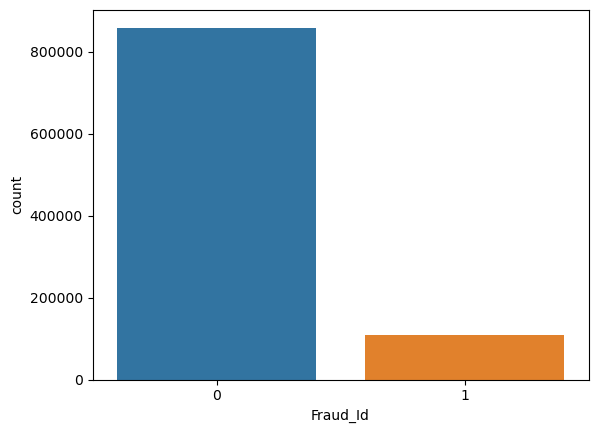

In [97]:
px=sns.countplot(x='Fraud_Id',data=data1)
print(data1['Fraud_Id'].value_counts())

# undersampling

In [98]:
target='Fraud_Id'

In [99]:
x=data1.loc[:,data1.columns!=target]
y=data1.loc[:,data1.columns==target]

In [100]:
fraud_df_len=len(y[y[target]==1])
print (fraud_df_len)

107838


In [101]:
fraud_df = data1[data1[target]==1].index
print (fraud_df)

Index([      2,     251,     680,     969,    1115,    1869,    2301,    3059,
          3162,    3271,
       ...
       1048224, 1048272, 1048274, 1048277, 1048300, 1048311, 1048328, 1048346,
       1048362, 1048520],
      dtype='int64', length=107838)


In [102]:
non_fraud_df = data1[data1[target] == 0].index
print (non_fraud_df)

Index([      0,       1,       4,       5,       6,       7,       8,      11,
            12,      13,
       ...
        994438,  996318, 1002588, 1006181, 1008162, 1009066, 1016390, 1020511,
       1026952, 1039127],
      dtype='int64', length=859067)


In [103]:
random_df=np.random.choice(non_fraud_df,fraud_df_len,replace=False)
print(len(random_df))

107838


In [104]:
sampling = np.concatenate([random_df, fraud_df])
under_sampling=data1.loc[sampling]
under_sampling

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,Fraud_Id
834024,41,PAYMENT,6884.58,26292.00,19407.42,0.00,0.00,0,0
574584,25,PAYMENT,25354.57,20411.02,0.00,0.00,0.00,0,0
1045985,95,CASH_OUT,32450.74,0.00,0.00,3979560.21,4012010.95,0,0
759948,38,CASH_OUT,33777.58,0.00,0.00,3549855.52,3583633.10,0,0
964413,44,TRANSFER,75089.86,0.00,0.00,29600000.00,29700000.00,0,0
...,...,...,...,...,...,...,...,...,...
1048311,95,CASH_OUT,127581.61,19465.38,0.00,12200000.00,12400000.00,0,1
1048328,95,CASH_OUT,160288.40,86596.72,0.00,243477.99,403766.39,0,1
1048346,95,CASH_OUT,88535.95,19849.00,0.00,4735102.87,4823638.82,0,1
1048362,95,CASH_OUT,127254.81,27983.44,0.00,4680935.70,5158939.32,0,1


Fraud_Id
0    859067
1    107838
Name: count, dtype: int64


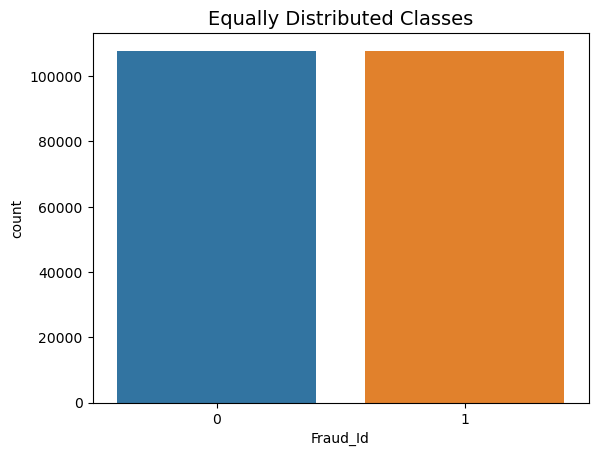

In [105]:
ax=sns.countplot(x=target,data=under_sampling)
print(data1[target].value_counts())
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# model performance

In [106]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder=preprocessing.LabelEncoder()

under_sampling['type']=label_encoder.fit_transform(under_sampling['type'])
under_sampling['Fraud_Id']=label_encoder.fit_transform(under_sampling['Fraud_Id'])
under_sampling['Fraud_Id'].unique()

array([0, 1], dtype=int64)

In [107]:
x=under_sampling.drop(['Fraud_Id'],axis=1)
y=under_sampling['Fraud_Id']

In [108]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [109]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((172540, 8), (43136, 8), (172540,), (43136,))

In [110]:
x_train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
228808,14,1,58416.37,0.00,0.0,160433.13,17717.60,0
308424,16,1,79184.57,102.00,0.0,272215.79,1171702.75,0
3271,2,4,14949.84,14949.84,0.0,0.00,0.00,0
340382,16,1,31999.19,15209.00,0.0,352498.16,384497.35,0
214870,13,3,5857.10,341334.00,335476.9,0.00,0.00,0
...,...,...,...,...,...,...,...,...
339486,16,1,443602.41,4814.00,0.0,424075.80,867678.21,0
425488,18,1,558770.63,0.00,0.0,3326551.04,3439804.79,0
610277,34,1,29444.03,5076.00,0.0,204872.54,234316.57,0
841765,41,1,166270.06,30844.00,0.0,0.00,166270.06,0


In [111]:
x_test

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
196056,13,1,102421.15,40486.00,0.00,0.00,102421.15,0
562682,22,3,11384.92,507139.57,495754.65,0.00,0.00,0
269895,15,1,82514.99,0.00,0.00,1890416.46,1972931.46,0
817402,40,0,4206.75,320207.84,324414.59,773861.99,769655.24,0
442608,19,1,46286.79,16542.00,0.00,263193.72,309480.51,0
...,...,...,...,...,...,...,...,...
87996,10,1,123532.06,0.00,0.00,1351861.73,1475393.79,0
225221,14,1,127789.70,105147.02,0.00,662568.20,790357.91,0
700688,37,1,55791.69,750.00,0.00,443436.00,499227.69,0
352520,17,4,513172.93,12581.00,0.00,0.00,513172.93,0


In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix

np.random.seed(42)

lr = LogisticRegression().fit(x_train, y_train)
y_pred_lr=lr.predict(x_test)

lr.score(x_test,y_test)

0.8807956231454006

In [114]:
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))
print(roc_auc_score(y_test,lr.predict_proba(x_test)[:,1]))

[[16617  4947]
 [  195 21377]]
              precision    recall  f1-score   support

           0       0.99      0.77      0.87     21564
           1       0.81      0.99      0.89     21572

    accuracy                           0.88     43136
   macro avg       0.90      0.88      0.88     43136
weighted avg       0.90      0.88      0.88     43136

0.9556033088262734


<Axes: >

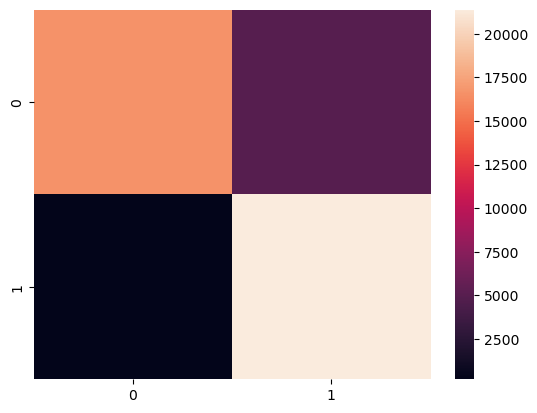

In [115]:
sns.heatmap(confusion_matrix(y_test,y_pred_lr))

# Confusion Matrix

[[16617  4947]
 [  195 21377]]


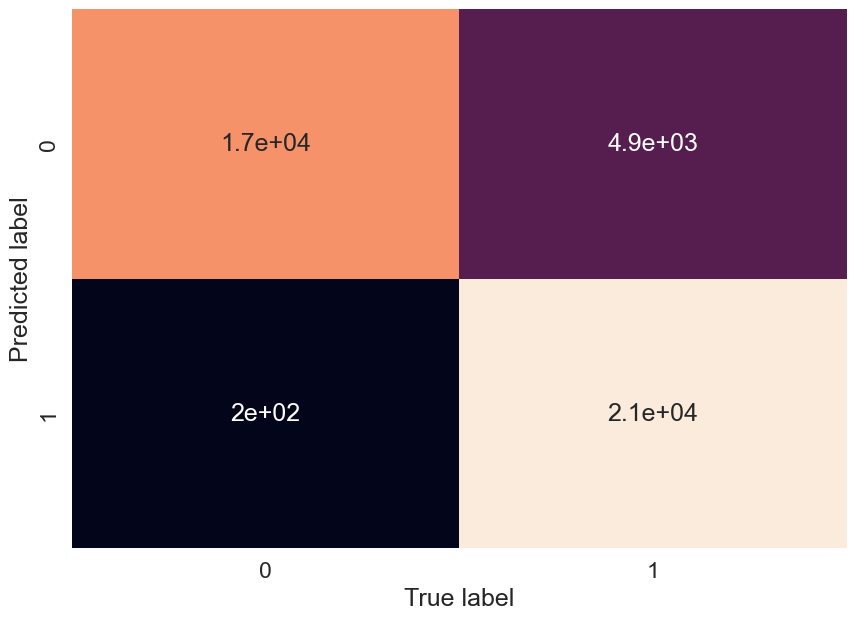

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

sns.set(font_scale=1.5)

y_pred = lr.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

def plot_conf_mat(y_test, y_pred):
  fig, ax = plt.subplots(figsize=(10,7))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_pred)

In [117]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87     21564
           1       0.81      0.99      0.89     21572

    accuracy                           0.88     43136
   macro avg       0.90      0.88      0.88     43136
weighted avg       0.90      0.88      0.88     43136



In [118]:
import numpy
import math
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder=preprocessing.LabelEncoder()

under_sampling['type']=label_encoder.fit_transform(under_sampling['type'])
under_sampling['Fraud_Id']=label_encoder.fit_transform(under_sampling['Fraud_Id'])
under_sampling['Fraud_Id'].unique()

array([0, 1], dtype=int64)

# Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix

In [121]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=1)

dt_clf = dt_clf.fit(x_train,y_train)

y_pred_dt = dt_clf.predict(x_test)

In [122]:
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
print(roc_auc_score(y_test,dt_clf.predict_proba(x_test)[:,1]))

[[21455   109]
 [ 5000 16572]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     21564
           1       0.99      0.77      0.87     21572

    accuracy                           0.88     43136
   macro avg       0.90      0.88      0.88     43136
weighted avg       0.90      0.88      0.88     43136

0.8815816698088577


# XGBoost classifier

In [123]:
xgbclassifier=xgb.XGBClassifier()
xgbclassifier.fit(x_train,y_train)
y_pred_xgb=xgbclassifier.predict(x_test)

In [124]:
print(confusion_matrix(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))
print(roc_auc_score(y_test,xgbclassifier.predict_proba(x_test)[:,1]))

[[21500    64]
 [ 3054 18518]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     21564
           1       1.00      0.86      0.92     21572

    accuracy                           0.93     43136
   macro avg       0.94      0.93      0.93     43136
weighted avg       0.94      0.93      0.93     43136

0.9897633792308866


<Axes: >

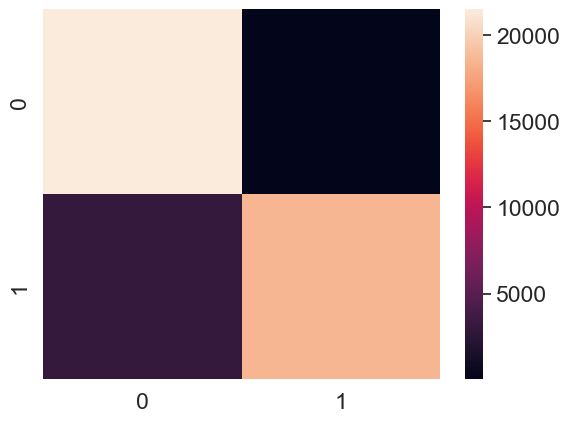

In [125]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb))

# Neuaral Network 

In [126]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,\
precision_score
ncols = len(x.columns)
hidden_layers = (ncols,ncols,ncols)
max_iter = 1000
MLP = MLPClassifier(hidden_layer_sizes=hidden_layers,max_iter=1000,random_state=42)

# training model
MLP.fit(x_train,y_train)
    
# evaluating model on how it performs on balanced datasets
predictionsMLP = MLP.predict(x_test)
CM_MLP = confusion_matrix(y_test,predictionsMLP)
CR_MLP = classification_report(y_test,predictionsMLP)
fprMLP, recallMLP, thresholdsMLP = roc_curve(y_test, predictionsMLP)
AUC_MLP = auc(fprMLP, recallMLP)
    
resultsMLP = {"Confusion Matrix":CM_MLP,"Classification Report":CR_MLP,"Area Under Curve":AUC_MLP}

In [127]:
for measure in resultsMLP:
    print(measure,": \n",resultsMLP[measure])

Confusion Matrix : 
 [[19284  2280]
 [  690 20882]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93     21564
           1       0.90      0.97      0.93     21572

    accuracy                           0.93     43136
   macro avg       0.93      0.93      0.93     43136
weighted avg       0.93      0.93      0.93     43136

Area Under Curve : 
 0.9311411585805339


# Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
rf = RandomForestClassifier().fit(x_train, y_train)
y_pred_rf=rf.predict(x_test)
rf.score(x_test, y_test)

0.8819779302670623

In [129]:
# 25 estimators
rf = RandomForestClassifier(n_estimators=25).fit(x_train, y_train)
rf.score(x_test, y_test)


0.8820474777448071

In [130]:
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print(roc_auc_score(y_test,rf.predict_proba(x_test)[:,1]))

[[21499    65]
 [ 5026 16546]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     21564
           1       1.00      0.77      0.87     21572

    accuracy                           0.88     43136
   macro avg       0.90      0.88      0.88     43136
weighted avg       0.90      0.88      0.88     43136

0.9181146535010053


<Axes: >

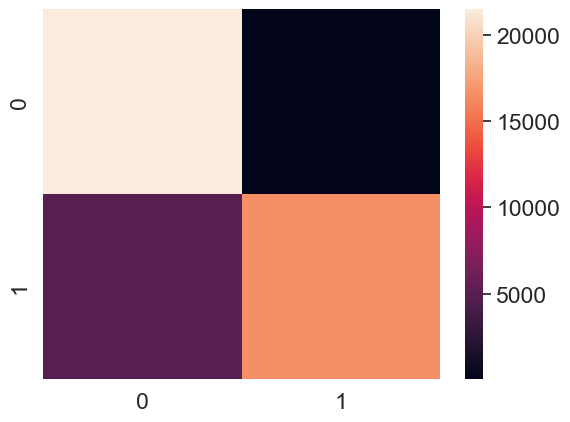

In [131]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf))

In [132]:
models={
     "Logistic Regression" : LogisticRegression()
} 

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name + "trained")
    
for name,model in models.items():
    print(name + "{:.2f}%".format(model.score(x_test,y_test)*100))

Logistic Regressiontrained
Logistic Regression88.08%


In [133]:
models={
     "K-Nearest Neighbors":KNeighborsClassifier()
} 

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name + "trained")
    
for name,model in models.items():
    print(name + "{:.2f}%".format(model.score(x_test,y_test)*100))

K-Nearest Neighborstrained
K-Nearest Neighbors88.90%


In [134]:
models={
     "Decision Tree"   : DecisionTreeClassifier()
} 

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name + "trained")
    
for name,model in models.items():
    print(name + "{:.2f}%".format(model.score(x_test,y_test)*100))

Decision Treetrained
Decision Tree88.14%


In [135]:
models={
    "Random Forest": RandomForestClassifier()
    
} 

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name + "trained")
    
for name,model in models.items():
    print(name + "{:.2f}%".format(model.score(x_test,y_test)*100))

Random Foresttrained
Random Forest88.21%


In [136]:
models={
    "Neural Network": MLPClassifier()
    
} 

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name + "trained")
    
for name,model in models.items():
    print(name + "{:.2f}%".format(model.score(x_test,y_test)*100))

Neural Networktrained
Neural Network95.93%


C:\Users\Asus\rajuas\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [137]:
models={
    "Gradient Boosting":GradientBoostingClassifier()
    
} 

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name + "trained")
    
for name,model in models.items():
    print(name + "{:.2f}%".format(model.score(x_test,y_test)*100))

Gradient Boostingtrained
Gradient Boosting87.99%


In [138]:
# compare models
models = []
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('MC', MLPClassifier()))
models.append(('XGB',xgb.XGBClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

C:\Users\Asus\rajuas\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\rajuas\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LR: 0.802371 (0.110545)
KNN: 0.866777 (0.059132)
CART: 0.980099 (0.024283)
MC: 0.858382 (0.136889)
XGB: 0.991070 (0.009257)


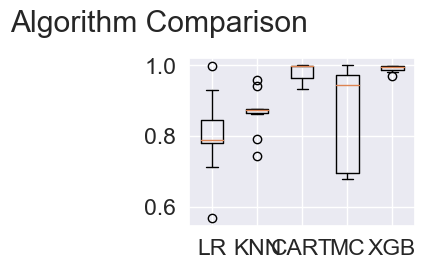

In [139]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(222)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


scaler = StandardScaler().fit(x_train)
x_train = scaler.fit_transform(x_train)
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [141]:
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(x_test)
predictions = model.predict(rescaledValidationX)
predictions

array([0, 1, 0, ..., 0, 0, 0])

In [142]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.9975426557863502
[[21560    57]
 [   49 21470]]


As per our model building roc_auc_score is high in XG BOOST


so the finalized best model is XGBOOST

# Deployment

Model Saving

In [143]:
from pickle import dump
from pickle import load


In [144]:
# save the model to disk
filename = 'trained_model.sav'
dump(model, open(filename, 'wb'))

In [145]:
# load the model from disk
loaded_model = load(open('trained_model.sav', 'rb'))



In [146]:
input_data=(1,181.0,181.0,0.0,21182.0,0,0,2,)

#Changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
#scaler=StandardScaler()
#std_data=scaler.fit_transform(input_data_reshaped)
#print(std data)

prediction=loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('The Transaction is not Fraudulent')
else:
    print('The Transaction is Fraudulent')

[0]
The Transaction is not Fraudulent


In [147]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
834024,41,3,6884.58,26292.00,19407.42,0.00,0.00,0
574584,25,3,25354.57,20411.02,0.00,0.00,0.00,0
1045985,95,1,32450.74,0.00,0.00,3979560.21,4012010.95,0
759948,38,1,33777.58,0.00,0.00,3549855.52,3583633.10,0
964413,44,4,75089.86,0.00,0.00,29600000.00,29700000.00,0
...,...,...,...,...,...,...,...,...
1048311,95,1,127581.61,19465.38,0.00,12200000.00,12400000.00,0
1048328,95,1,160288.40,86596.72,0.00,243477.99,403766.39,0
1048346,95,1,88535.95,19849.00,0.00,4735102.87,4823638.82,0
1048362,95,1,127254.81,27983.44,0.00,4680935.70,5158939.32,0


In [148]:
lr_class= LogisticRegression()
lr_class.fit(x,y)

C:\Users\Asus\rajuas\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
print('Accuracy Score:', np.round(lr_class.score(x, y), decimals = 3))

Accuracy Score: 0.796


In [150]:
from joblib import dump, load
import joblib

In [151]:
joblib.dump(lr_class, 'fraudmodel.pkl') 

['fraudmodel.pkl']

In [152]:
loaded_model = joblib.load('fraudmodel.pkl')

In [153]:
x.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'],
      dtype='object')

In [154]:
real_values = np.array([743, 2, 339682.13, 339682.13, 0.0, 0.00, 339682.13,0.098,]).reshape(1, -1)

In [155]:
loaded_model.predict(real_values)

C:\Users\Asus\rajuas\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)